In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/pickled-glove840b300d-for-10sec-loading/glove.840B.300d.pkl
/kaggle/input/hackerearth-effectiveness-of-std-drugs/dataset/train.csv
/kaggle/input/hackerearth-effectiveness-of-std-drugs/dataset/test.csv
/kaggle/input/glove840b300dtxt/glove.840B.300d.txt


In [2]:
df= pd.read_csv("/kaggle/input/hackerearth-effectiveness-of-std-drugs/dataset/train.csv")
to_test = pd.read_csv("/kaggle/input/hackerearth-effectiveness-of-std-drugs/dataset/test.csv")

In [3]:
df.head(1)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969


- there are 2220 **name_of_drug** out of 32165 records

- there are 636 **use_case_for_drug** out of 32165 records

In [4]:
to_test = to_test[["patient_id","name_of_drug","use_case_for_drug","review_by_patient","effectiveness_rating","drug_approved_by_UIC","number_of_times_prescribed"]]
to_test.head(1)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22


# scale btw 0 and 1

In [5]:
# ################################


min_rating = df.effectiveness_rating.min()
max_rating = df.effectiveness_rating.max()

def scale_rating(rating):
    rating -= min_rating
    rating = rating/(max_rating -1)
    rating *= 5
    rating = int(round(rating,0))
    
    if(int(rating) == 0 or int(rating)==1 or int(rating)==2):
        return 0
    else:
        return 1
    


    
df['new_eff_score'] = df.effectiveness_rating.apply(scale_rating)
to_test['new_eff_score'] = df.effectiveness_rating.apply(scale_rating)

# X.drop("effectiveness_rating",axis=1,inplace=True)

In [6]:

df.drop(["patient_id","name_of_drug",
        "use_case_for_drug",
        "review_by_patient","drug_approved_by_UIC"],axis=1,inplace=True)


to_test.drop(["patient_id","name_of_drug",
        "use_case_for_drug",
        "review_by_patient","drug_approved_by_UIC"],axis=1,inplace=True)

In [7]:
df.head(1)

,effectiveness_rating,number_of_times_prescribed,base_score,new_eff_score
0,9,27,8.022969,1


In [8]:
to_test.head(1)

,effectiveness_rating,number_of_times_prescribed,new_eff_score
0,10,22,1


# plotting the correlatiion

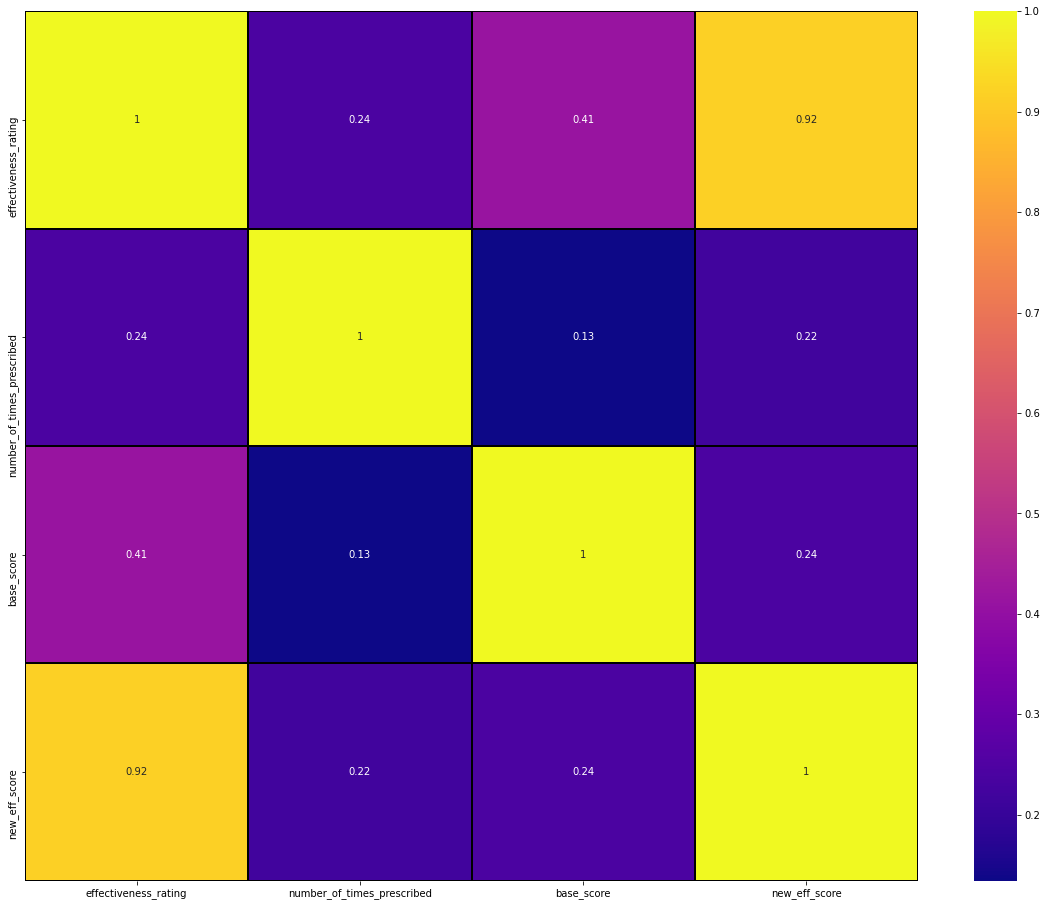

In [9]:
tc = df.corr() 

plt.figure(figsize=(20,16))
sns.heatmap(tc, annot = True, cmap ='plasma',  
            linecolor ='black', linewidths = 1) 


# Scaling

In [10]:
X = df.drop("base_score",axis=1)
y= df.base_score




from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)
y= y.values.reshape(-1,1)
# y=sc.fit_transform(y)




to_test = sc.transform(to_test)

In [11]:
# X

In [12]:
################################

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

# X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

# Spliting into X and Y

In [13]:
################################

from sklearn.model_selection import train_test_split as split

X_train, X_test, y_train, y_test = split(X,y, test_size=0.01)#,random_state=27

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31843, 3)
(31843, 1)
(322, 3)
(322, 1)


# Model

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor( n_estimators =2400,
                         max_depth =7,
                         learning_rate=0.05,
                         scale_pos_weight=2,
                         max_bin=2,
                         
#                          gamma=0.01,
#                         min_child_weight=9,
#                          subsample = 0.75,
#                          colsample_bytree=0.9
#                          max_delta_step=2,
#                          eval_metric=rmse,
#                          reg_lambda=1,
#                          sketch_eps=0.01
#                          scale_pos_weight=2,
    
                        )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)   # best = 1

In [ ]:
import lightgbm as lgb
l_obj = lgb.LGBMRegressor(boosting_type='gbdt',
    num_leaves=300,
    max_depth=16,
    learning_rate=0.5,
    n_estimators=400,
    subsample_for_bin=200000,
    objective=None,
#     class_weight=,
#     min_split_gain=0.01,
#     min_child_weight=0.1,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    n_jobs=-1,
    silent=True,)

l_obj.fit(X_train, y_train)
y_pred = l_obj.predict(X_test)


print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
# from sklearn.model_selection import cross_val_score, cross_val_predict
# scores = cross_val_score(model, X, y, cv=10)

In [ ]:
# scores

# Using HyperOpt

In [ ]:
from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
# XGB parameters
xgb_reg_params = {
    'learning_rate':    hp.choice('learning_rate',    np.arange(0.05, 0.31, 0.05)),
    'max_depth':        hp.choice('max_depth',        np.arange(5, 16, 1, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 8, 1, dtype=int)),
    'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3, 0.8, 0.1)),
    'subsample':        hp.uniform('subsample', 0.8, 1),
    'n_estimators':     hp.choice('n_estimators', np.arange(500,2400, dtype=int)),
}

In [ ]:

xgb_fit_params = {
    'eval_metric': 'rmse',
    'early_stopping_rounds': 10,
    'verbose': False
}

In [ ]:
from sklearn.metrics import mean_squared_error
xgb_para = dict()
xgb_para['reg_params'] = xgb_reg_params
xgb_para['fit_params'] = xgb_fit_params
xgb_para['loss_func' ] = lambda y,pred: np.sqrt(mean_squared_error(y, pred))

After setting the parameters we can create a class HPOpt that is instantiated with training and testing data and provides the training functions. Here I include only the Regressor examples. You may add your own classification, training or cross-validation function inside the class.

In [ ]:
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials


In [ ]:
class HPOpt(object):

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test  = x_test
        self.y_train = y_train
        self.y_test  = y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def xgb_reg(self, para):
        reg = xgb.XGBRegressor(**para['reg_params'])
        return self.train_reg(reg, para)


    def train_reg(self, reg, para):
        reg.fit(self.x_train, self.y_train,
                eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                **para['fit_params'])
        pred = reg.predict(self.x_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}


For example, given the pre-defined DataFrames x_train, x_test, y_train, y_test , we can run the optimization process by calling process() :

In [ ]:
obj = HPOpt(X_train, X_test, y_train, y_test)

In [ ]:
xgb_opt = obj.process(fn_name='xgb_reg', space=xgb_para, trials=Trials(), algo=tpe.suggest, max_evals=100)

In [ ]:
print (xgb_opt)

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor( n_estimators =1140,
                         max_depth =6,
                         learning_rate=0.15,
                         min_child_weight=0
    
                        )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


# Submission

# Saving

In [ ]:
result = model.predict(to_test)

In [ ]:
result.max()

In [ ]:
result.min()

In [ ]:
result.mean()

In [ ]:
# def mul(num):
#     num = num*10
#     return num

In [ ]:
# result =np.apply_along_axis(mul, 0, result)

In [ ]:
temp_df=pd.read_csv("/kaggle/input/hackerearth-effectiveness-of-std-drugs/dataset/test.csv")

result_data=temp_df['patient_id']

In [ ]:
result_data = pd.DataFrame(result_data)

In [ ]:
result_data['base_score']=result

result_data.to_csv('std_95.csv',index=False) 

In [ ]:
result_data.head()

In [ ]:
"""
0	163740	8.756289
1	39293	8.745075
2	208087	5.955608
3	23295	5.985869
4	97013	5.322215
"""

# More Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb


In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
test_predictions = reg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,test_predictions)))
print("------------------")

In [ ]:
clf = DecisionTreeRegressor()
#max_features=2,max_depth=5,
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


In [ ]:

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)


print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


In [ ]:
gregr = GradientBoostingRegressor(learning_rate=0.005,max_depth=5)
gregr.fit(X_train, y_train)
y_pred = gregr.predict(X_test)


print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


In [ ]:
model = BaggingRegressor(n_estimators=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


In [ ]:
# from sklearn.svm import SVR
# model = SVR()
# model.fit(X_train, y_train)
# # y_pred = logreg.predict(X_test)
# y_pred = model.predict(X_test)


# print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


In [ ]:
neigh = KNeighborsRegressor(n_neighbors=3)

neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)


print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


In [ ]:
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
import lightgbm as lgb
l_obj = lgb.LGBMRegressor(boosting_type='gbdt',
    num_leaves=170,
    max_depth=9,
    learning_rate=0.05,
    n_estimators=2400,
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    n_jobs=-1,
    silent=True,)

l_obj.fit(X_train, y_train)
y_pred = l_obj.predict(X_test)


print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


In [ ]:


model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))